# Problem 1: Basics of Clustering

In [1]:
%pylab inline
np.random.seed(0)
import mltools as ml
plt.style.use('fivethirtyeight')

Populating the interactive namespace from numpy and matplotlib


## (a) Load the usual Iris data restricted to the first two features
and ignore the class / target
variable. Plot the data and see for yourself how "clustered" you think it looks. (You don't
have to report on this.)

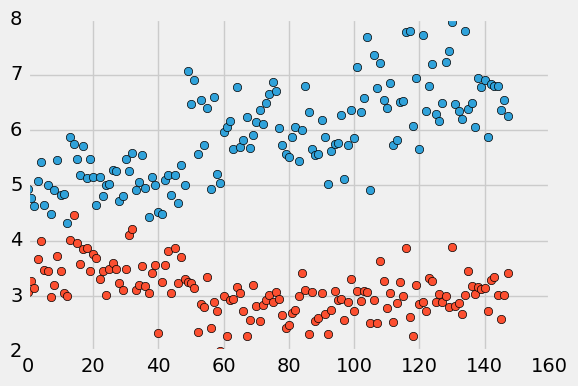

In [2]:
iris = np.genfromtxt("data/iris.txt", delimiter=None)  
Y = iris[:, -1]  # target value is the last column
X = iris[:, 0:2]  # first two features
plt.plot(X,"o")
plt.show()

## (b) Run k-means on the data, for k = 5 and k = 20. 
For each, turn in a plot with the data,
colored by assignment, and the cluster centers. (You can easily do this yourself manually,
using ml.plotClassify2D(None,X,z), where z are the resulting cluster assignments of the
data.) Try a few (5+) different initializations and check to see whether they find the same
solution; if not, pick the one with the best score.

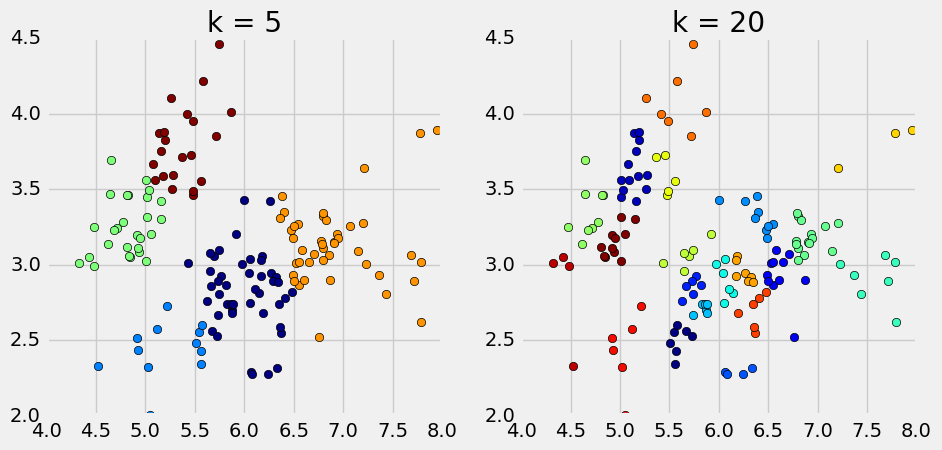

In [3]:
# k = 5
fig = plt.figure(figsize=(10,10))
fig.add_subplot(221)
z, c, sumd = ml.cluster.kmeans(X, 5)
plt.title("k = 5")
ml.plotClassify2D(None, X, z)
fig.add_subplot(222)
z, c, sumd = ml.cluster.kmeans(X, 20)
plt.title("k = 20")
ml.plotClassify2D(None, X, z)
plt.show()

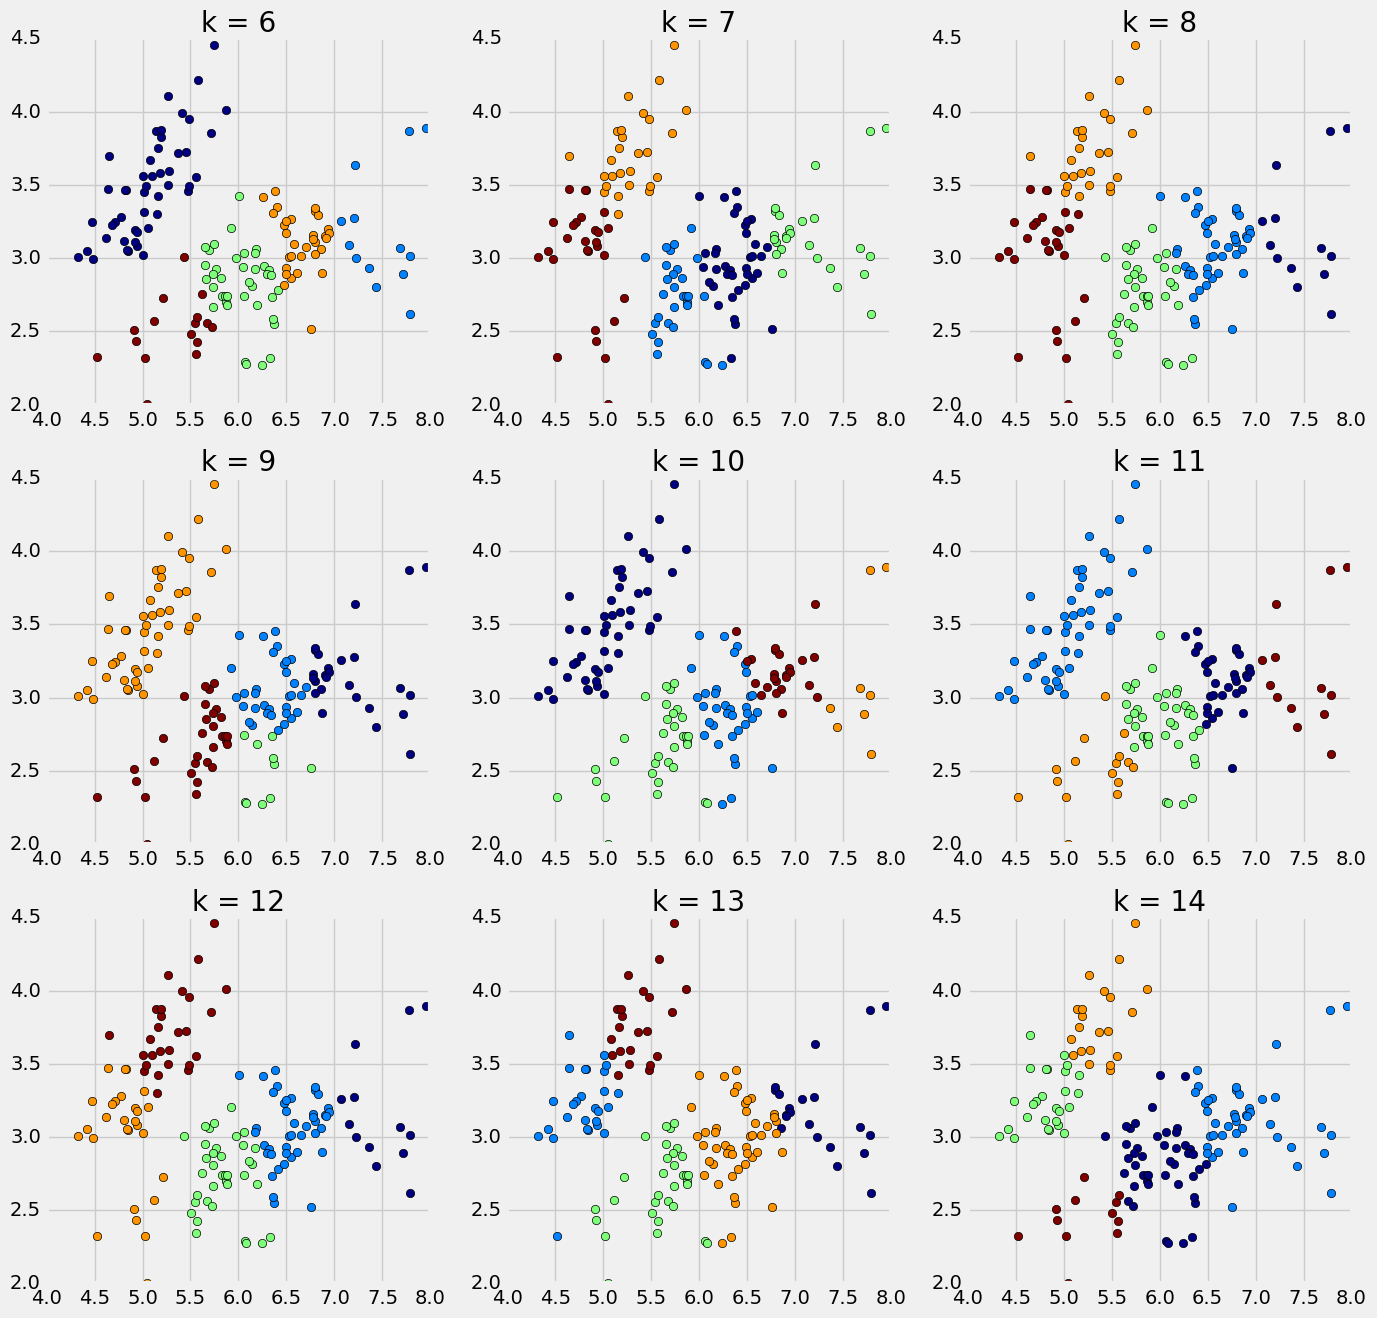

In [4]:
fig = plt.figure(figsize=(15,15))
fnum = 1
for k in range(6, 15):
    fig.add_subplot(3,3,fnum)
    z, c, sumd = ml.cluster.kmeans(X, 5)
    plt.title("k = %d"%(k))
    ml.plotClassify2D(None, X, z)
    fnum+=1
plt.show()

They find similar solutions in range 6 to 14. I would choose k = 12 as the best one. 

## (c) Run agglomerative clustering on the data, 
using single linkage and then again using complete linkage, each with 5 and then 20 clusters. Again, plot with color the final assignment of the
clusters, and describe their similarities and differences from each other and k-means. (This
algorithm has no initialization issues; so you do not have to try multiple initializations.)

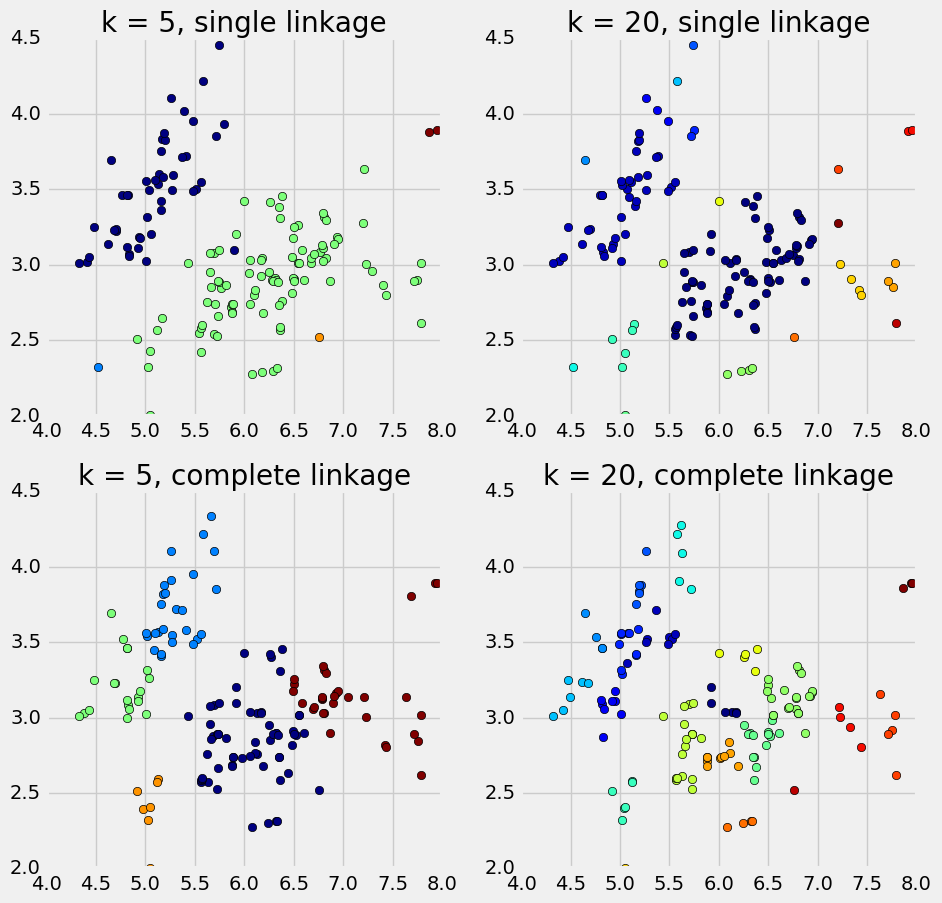

In [5]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(221)
z, join = ml.cluster.agglomerative(X, 5, "min")
plt.title("k = 5, single linkage")
ml.plotClassify2D(None, X, z)
fig.add_subplot(222)
z, join = ml.cluster.agglomerative(X, 20,"min")
plt.title("k = 20, single linkage")
ml.plotClassify2D(None, X, z)
fig.add_subplot(223)
z, join = ml.cluster.agglomerative(X, 5, "max")
plt.title("k = 5, complete linkage")
ml.plotClassify2D(None, X, z)
fig.add_subplot(224)
z, join = ml.cluster.agglomerative(X, 20,"max")
plt.title("k = 20, complete linkage")
ml.plotClassify2D(None, X, z)

### K = 5:
Single get a worsest result among the three methods (k-mean, single linkage, complete linkage), and there are many small clusters. K-mean and complete linkage both get a good result with 5 clusters. 

### K = 20:
all of them are not getting good result. 

# Problem 2: EigenFaces

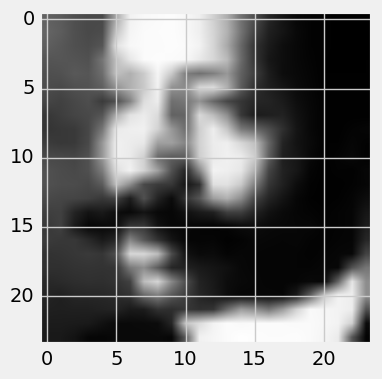

In [6]:
X = np.genfromtxt("data/faces.txt", delimiter=None) # load face dataset
plt.figure()
# pick a data point i for display
img = np.reshape(X[0,:],(24,24)) # convert vectorized data point to 24x24 image patch
plt.imshow( img.T , cmap="gray") # display image patch; you may have to squint
plt.show()

## (a) Subtract the mean of the face images ($X_0 = X - \mu$) to make your data zero-mean.
(The mean
should be of the same dimension as a face, 576 pixels.)

In [7]:
mean = np.mean(X,axis=0)
X0 = X-mean

## (b) Use scipy.linalg.svd to take the SVD of the data, so that
$X_0 = U \cdot diag(S) \cdot V h$  

Note that since the number of data is larger than the number of dimensions, there are at
most 576 non-zero singular values; you can use full_matrices=False to avoid using a lot
of memory. As in the slides, I suggest computing W = U.dot( np.diag(S) ) so that $X0 \approx
W \cdot V h$.

In [8]:
U, S, Vh = linalg.svd(X0, full_matrices=False) # compute svd
W = U.dot( np.diag(S) )
X0 = W.dot(Vh)

## (c) For K = 1 ... 10, compute the approximation to $X_0$ given by the first K eigendirections,
e.g.,
$\hat{X_0} = W[:, : K] \cdot V h[: K, :]$, and use them to compute the mean squared error in the SVD's
approximation, np.mean( $(X_0 - \hat{X_0})**2$ ). Plot these MSE values as a function of K.

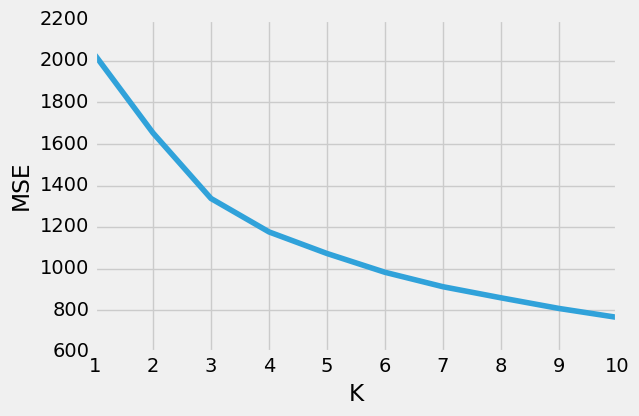

In [9]:
mse = []
for k in range(1,11):
    X0_hat = W[:,:k].dot(Vh[:k,:])
    mse.append(np.mean((X0 - X0_hat)**2))
plt.plot( np.arange(1,11),mse)
plt.xlabel("K")
plt.ylabel("MSE")
plt.show()

## (d) Display the first three principal directions of the data,
by computing $\mu+\alpha V[j,:]$ and $\mu-\alpha V[j,:]$,
where $\alpha$ is a scale factor (I suggest, for example, 2*np.median(np.abs(W[:,j])), Wo get
a sense of the scale found in the data). These should be vectors of length $24^2 = 576$, so you
can reshape them and view them as "face images" just like the original data. They should be
similar to the images in lecture.

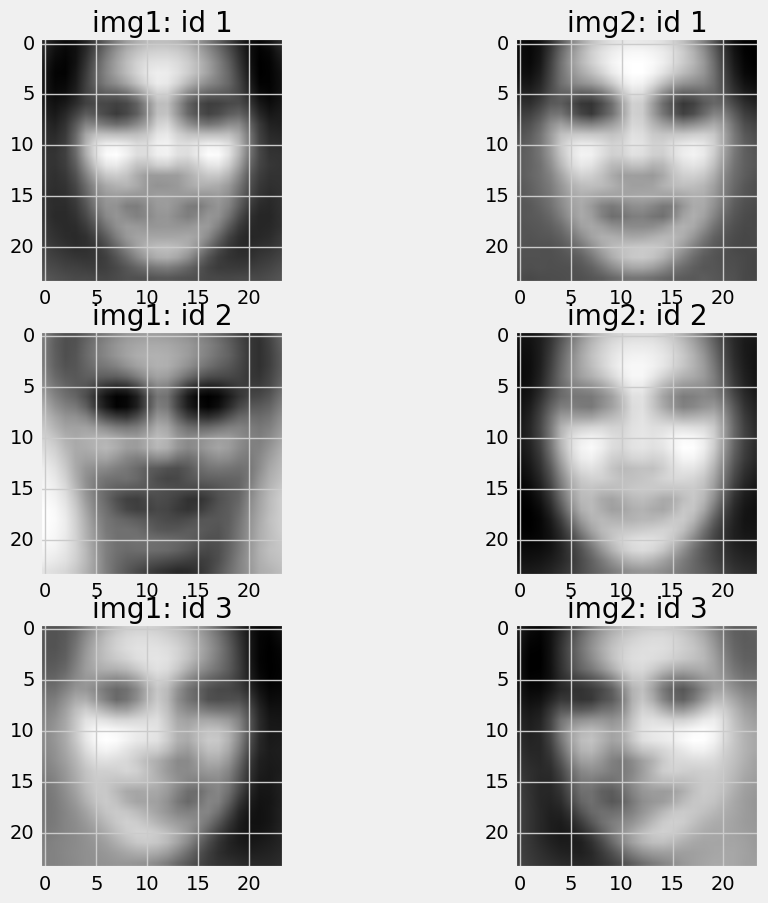

In [10]:
fig = plt.figure(figsize=(10,10))
fnum = 1
for j in range(0,3):
    alpha = 2*np.median(np.abs(W[:,j]))
    fig.add_subplot(3,2,fnum)
    img1 = np.reshape(mean+alpha*Vh[j,:], (24,24)).T
    plt.title("img1: id %d"%(j+1))
    plt.imshow(img1,cmap='gray')
    fnum+=1
    fig.add_subplot(3,2,fnum)
    img2 = np.reshape(mean-alpha*Vh[j,:], (24,24)).T
    plt.title("img2: id %d"%(j+1))
    plt.imshow(img2,cmap='gray')
    fnum+=1
plt.show()
    

## (e) Choose two faces and reconstruct them using only the first K principal directions, for K = 5, 10, 50, 100

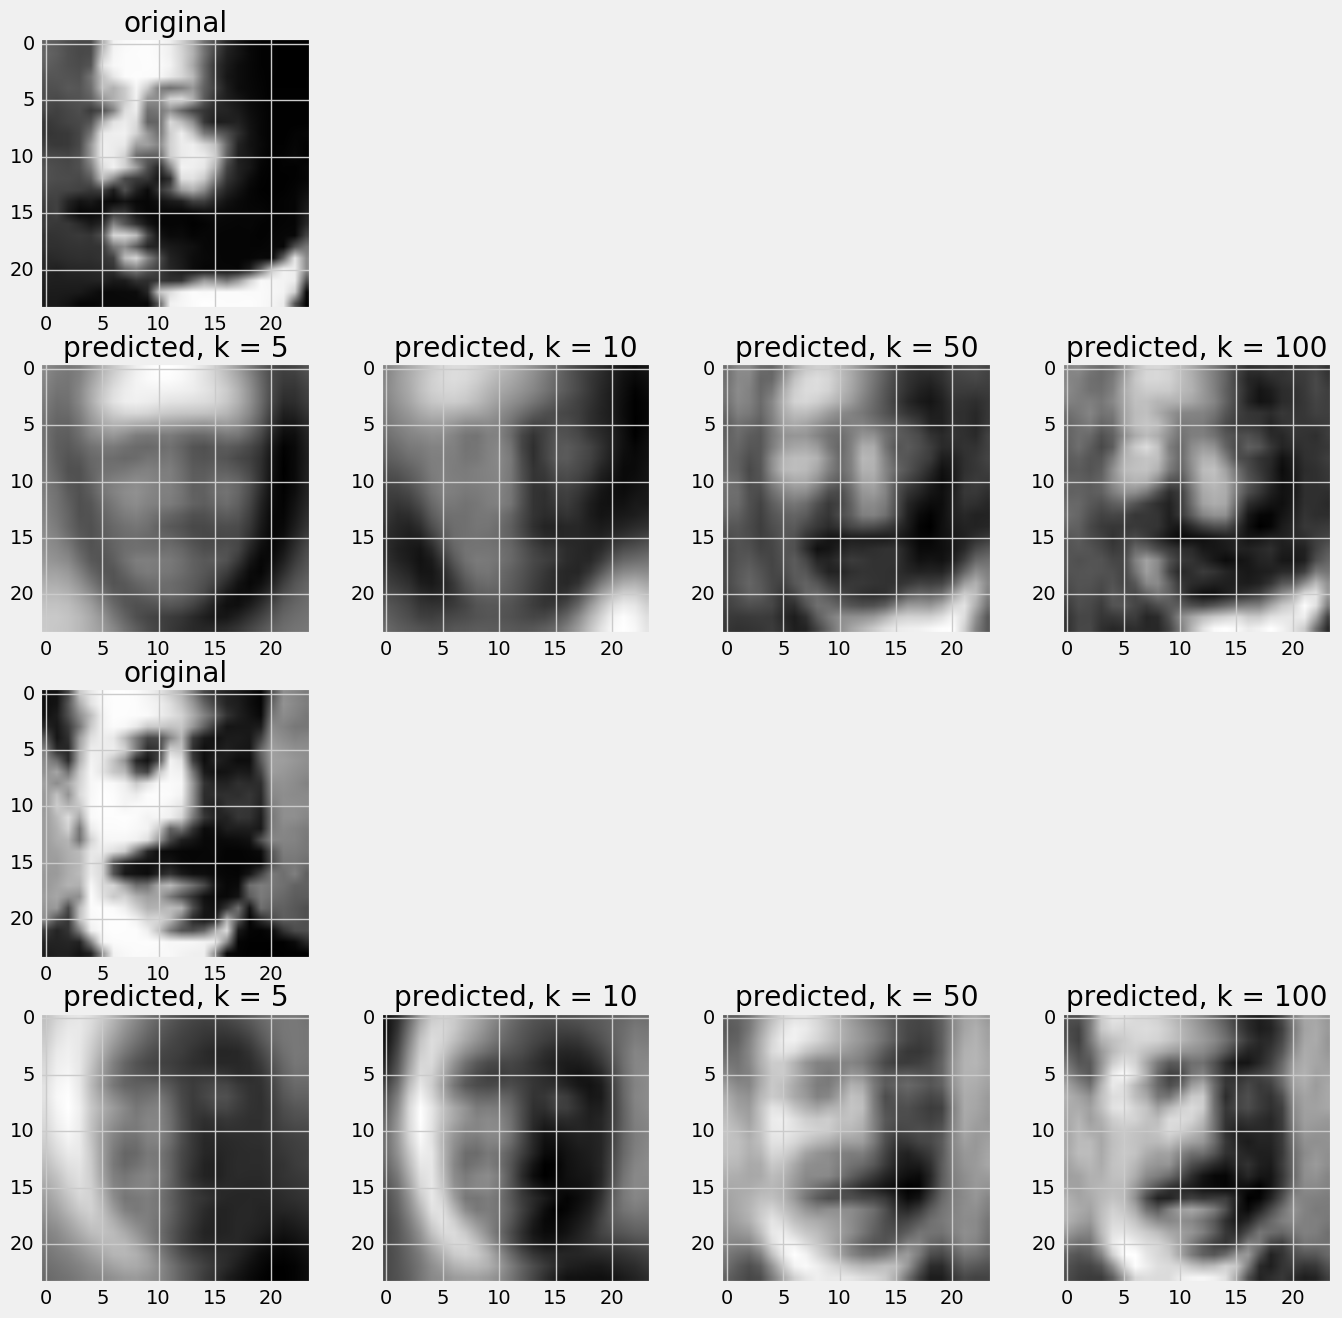

In [11]:
faces_hats = []
Ks = [5,10,50,100]
for k in Ks:
    faces_hats.append(W[:,:k].dot(Vh[:k,:]))
    
fig = plt.figure(figsize=(15,15))
fnum=1
for i in [0,1]:
    fig.add_subplot(4,4,fnum)
    original = np.reshape(X[i],(24,24)).T
    plt.title("original")
    plt.imshow(original,cmap='gray')
    fnum+=4
    for k in range(0,4):
        fig.add_subplot(4,4,fnum)
        face = np.reshape(faces_hats[k][i],(24,24)).T
        plt.title("predicted, k = %d"%(Ks[k]))
        plt.imshow(face,cmap='gray')
        fnum+=1
plt.show()
        

## (f) Methods like PCA are often called "latent space" methods, as the coefficients can be interpreted as a new geometric space in which the data are being described. 
To visualize this, choose a
few faces at random (say, about 15-25), and display them as images with the coordinates
given by their coefficients on the first two principal components:

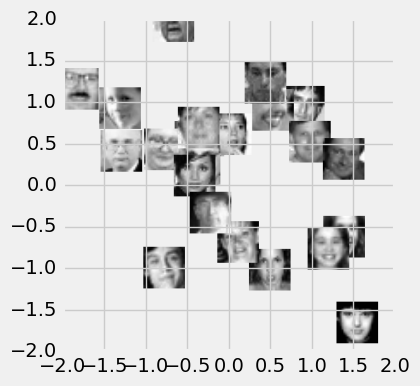

In [12]:
idx =randint(0,X.shape[0],25) # pick some data at random or otherwise; a list / vector of integer indices
coord,params = ml.transforms.rescale( W[:,0:2] ) # normalize scale of "W" locations
plt.figure(); plt.hold(True); # you may need this for pyplot
for i in idx:
# compute where to place image (scaled W values) & size
    loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5)
    img = np.reshape( X[i,:], (24,24) ) # reshape to square
    plt.imshow( img.T , cmap="gray", extent=loc ) # draw each image
    plt.axis( (-2,2,-2,2) ) # set axis to reasonable visual scale